In [2]:
#import packages
import pandas as pd 
import numpy as np 

# notebook configuration
np.random.seed(123)
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load data 
data = pd.read_csv("../data/questdb-query-1648823449391.csv")

In [5]:
# top rows 
data.head() 

,timestamp,galon_price
0,2000-06-05T00:00:00.000000Z,1.610
1,2000-06-12T00:00:00.000000Z,1.650
2,2000-06-19T00:00:00.000000Z,1.686
3,2000-06-26T00:00:00.000000Z,1.705
4,2000-07-03T00:00:00.000000Z,1.711


In [6]:
#shape of the data
data.shape 

(1028, 2)

In [7]:
# data information
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    1028 non-null   object 
 1   galon_price  1028 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.2+ KB


In [8]:
# convert timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'],format='%Y-%m-%d')

In [9]:
#set timestamp column as index 
data.set_index('timestamp', inplace=True)

In [10]:
# view sample rows

data.sample(10)

,galon_price
timestamp,
2009-10-05 00:00:00+00:00,2.502
2000-09-04 00:00:00+00:00,1.625
2003-06-02 00:00:00+00:00,1.538
2003-09-22 00:00:00+00:00,1.774
2012-08-20 00:00:00+00:00,3.821
2009-08-03 00:00:00+00:00,2.600
2014-02-17 00:00:00+00:00,3.511
2005-04-04 00:00:00+00:00,2.133
2012-04-16 00:00:00+00:00,3.963


In [41]:
#import time series module 
from pycaret.time_series import *

In [42]:
# create the environment
exp = setup(data,
            fh = 30, 
            fold = 3, 
            seasonal_period='D',
            session_id = 789)

,Description,Value
0,session_id,789
1,Target,galon_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(1028, 1)"
5,Train data shape,"(998, 1)"
6,Test data shape,"(30, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [43]:
#statistics testing 
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,1028.0
1,Summary,Statistics,Actual,Mean,,2.568842
2,Summary,Statistics,Actual,Median,,2.5605
3,Summary,Statistics,Actual,Standard Deviation,,0.745594
4,Summary,Statistics,Actual,Variance,,0.555911
5,Summary,Statistics,Actual,Kurtosis,,-0.906041
6,Summary,Statistics,Actual,Skewness,,0.153169
7,Summary,Statistics,Actual,# Distinct Values,,835.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",19228.842822
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",32219.132058


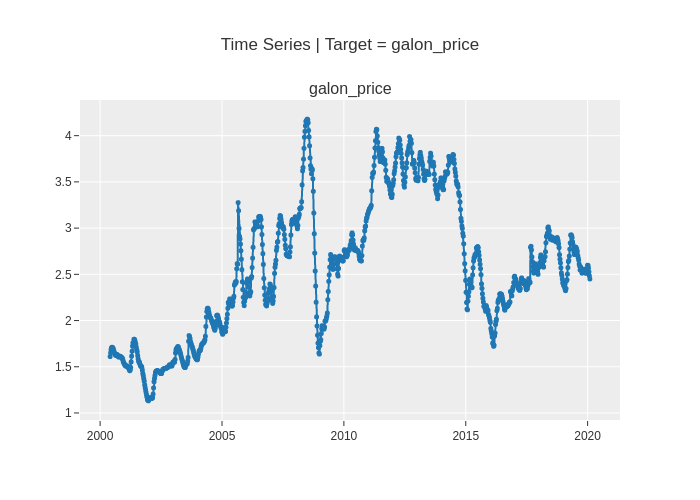

In [45]:
# Time Series Plot
exp.plot_model(plot = 'ts')

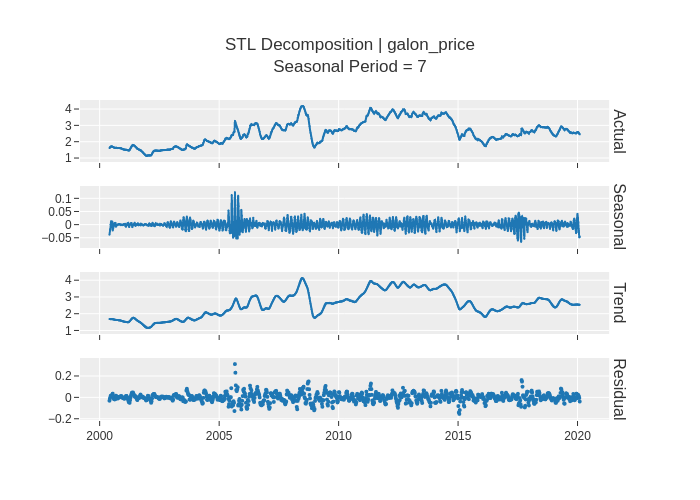

In [47]:
# Decomposition plot
exp.plot_model(plot = 'decomp_stl')

In [48]:
# train multiple algorithms 
best_model = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.1365,0.1631,0.0498,0.0506,0.7421,0.6322,-0.7454,0.1133
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.1476,0.1739,0.055,0.0537,0.8064,0.677,-0.6021,2.5400
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.1553,0.1959,0.0571,0.0567,0.8502,0.7631,-0.8527,2.1433
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.1618,0.1903,0.0594,0.0569,0.8839,0.7407,-1.8417,0.1000
croston,Croston,0.1544,0.188,0.0579,0.0577,0.8443,0.7316,-0.5343,0.0267
snaive,Seasonal Naive Forecaster,0.156,0.1918,0.0584,0.058,0.8537,0.7467,-0.5777,0.0233
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.1676,0.1952,0.0615,0.0587,0.9154,0.7597,-2.058,0.1000
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,0.1675,0.1951,0.0614,0.0587,0.9149,0.7593,-2.0538,0.0967
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,0.164,0.203,0.0601,0.0598,0.8969,0.7902,-1.0466,0.1000
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.1702,0.2149,0.0618,0.0621,0.932,0.8375,-1.167,0.1800


In [36]:
#all available metrics 
get_metrics() 

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x7f78463e4f80>,neg_mean_absolute_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x7f78463e4a70>,neg_root_mean_squared_error,pred,{'squared': False},False,False
mape,MAPE,MAPE,<function mape at 0x7f7844090dd0>,"make_scorer(mape, greater_is_better=False)",pred,{},False,False
smape,SMAPE,SMAPE,<function _smape_loss at 0x7f78453eb4d0>,"make_scorer(_smape_loss, greater_is_better=False)",pred,{},False,False
mase,MASE,MASE,<function mase at 0x7f78440950e0>,"make_scorer(mase, greater_is_better=False)",pred,{},False,False
rmsse,RMSSE,RMSSE,<function rmsse at 0x7f78440959e0>,"make_scorer(rmsse, greater_is_better=False)",pred,{},False,False
r2,R2,R2,<function r2_score at 0x7f78463e9dd0>,r2,pred,{},True,False


In [49]:
# create arimo model
arima = create_model('arima')
print(arima)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2017-10-17/2017-10-23,0.4823,0.5509,0.1772,0.1998,2.5989,2.1202,-17.0571
1,2018-05-15/2018-05-21,0.5757,0.6487,0.2085,0.1837,3.1414,2.5228,-24.1881
2,2018-12-11/2018-12-17,0.5773,0.6940,0.2098,0.2465,3.1921,2.7265,-10.2889
Mean,NaT,0.5451,0.6312,0.1985,0.2100,2.9774,2.4565,-17.1780
SD,NaT,0.0444,0.0597,0.0151,0.0266,0.2685,0.2519,5.6750


ARIMA(seasonal_order=(0, 1, 0, 7))


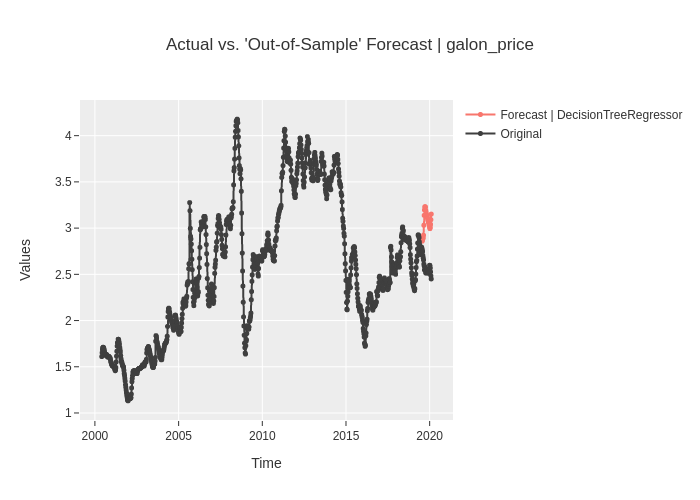

In [52]:
#
plot_model(best_model, plot = 'forecast')

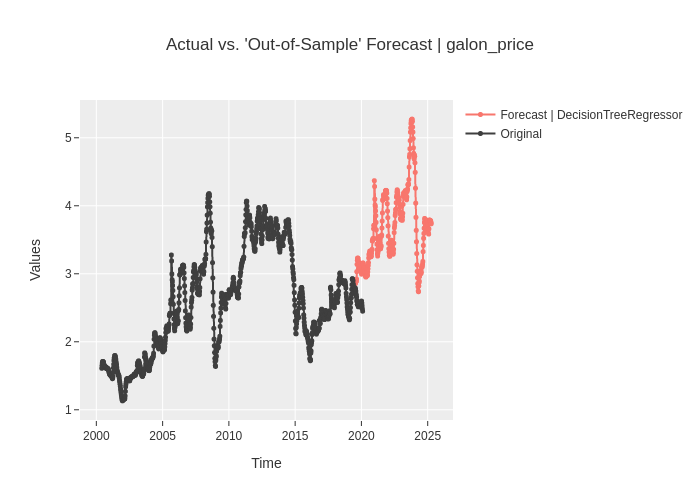

In [53]:
# forecast in unknown future
plot_model(best_model, plot = 'forecast', data_kwargs = {'fh' : 300})

In [54]:
# finalize model with the entire dataset
final_best_model = finalize_model(best_model)


In [56]:
# generate predictions
predict_model(final_best_model, fh = 12)

,y_pred
2020-02-11/2020-02-17,2.4454
2020-02-18/2020-02-24,2.4184
2020-02-25/2020-03-02,2.3914
2020-03-03/2020-03-09,2.3616
2020-03-10/2020-03-16,2.3436
2020-03-17/2020-03-23,2.3660
2020-03-24/2020-03-30,2.3846
2020-03-31/2020-04-06,2.4030
2020-04-07/2020-04-13,2.3871
2020-04-14/2020-04-20,2.3999


In [57]:
# save the model
save_model(final_best_model, '../model/my_best_model')

Transformation Pipeline and Model Successfully Saved


(BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=789), sp=7,
                     window_length=7),
 '/content/drive/MyDrive/ColabNotebooks/2nd_draft_dev_article/model/my_best_model.pkl')